In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import trange 

    

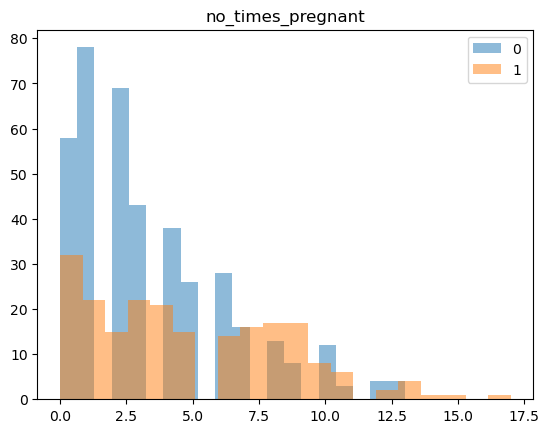

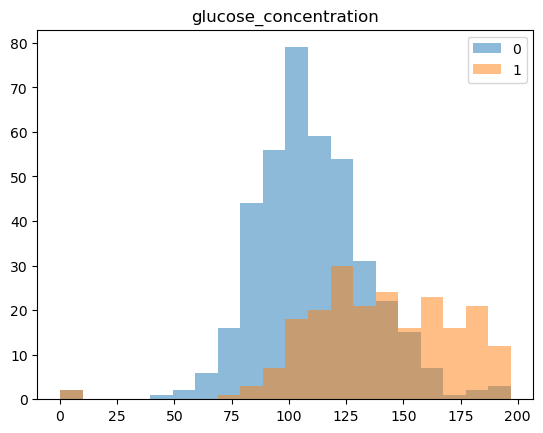

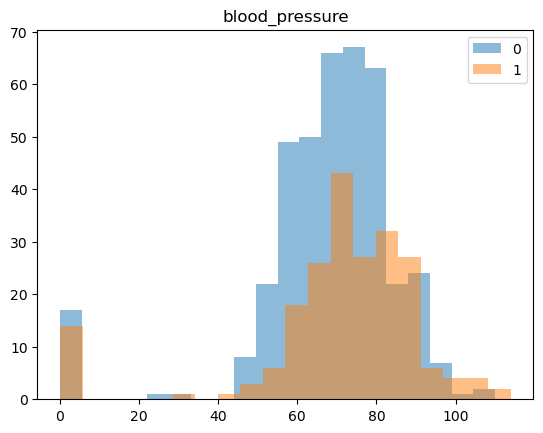

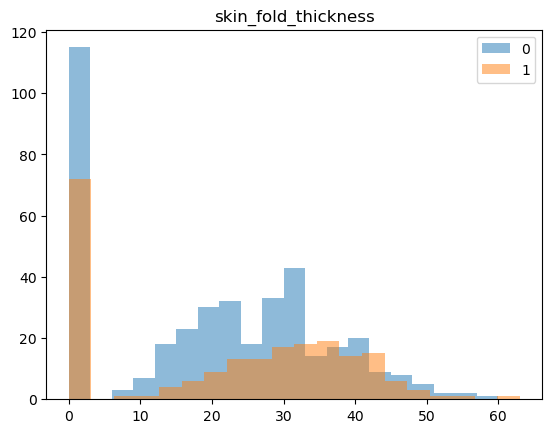

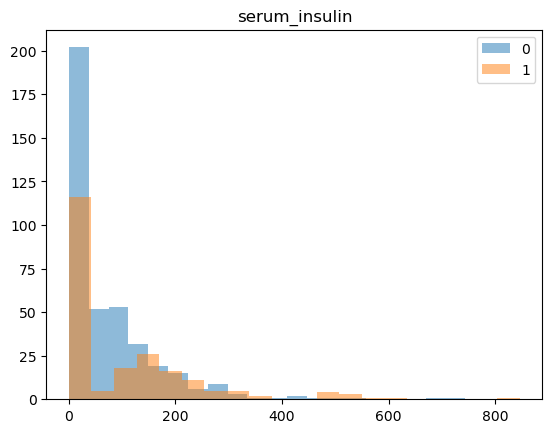

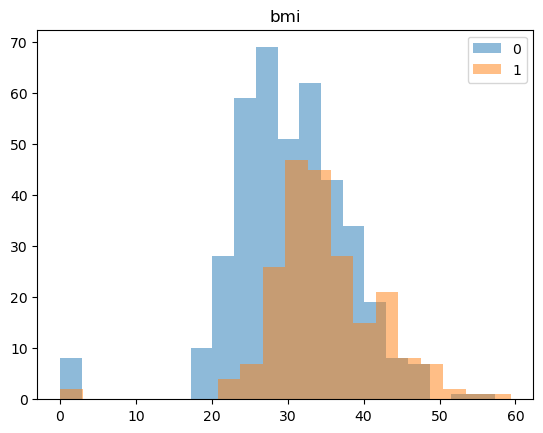

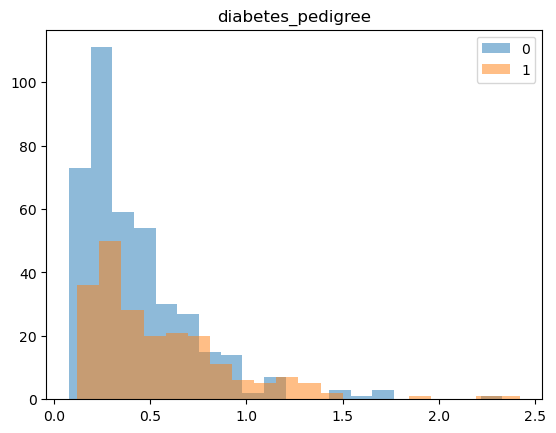

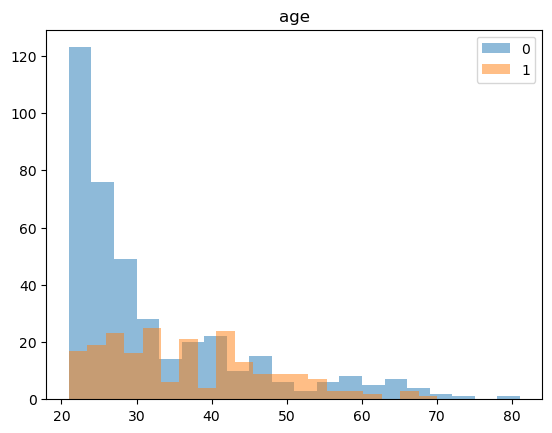

In [116]:
train_data = pd.read_csv("train.csv")


train_data_x = train_data.iloc[:, 1:-1]
train_data_y = train_data.iloc[:, -1]

titles = train_data_x.columns.values.tolist()
# use matpltlib to draw distribution of each feature with different train_data_y
# differnet color for different diabetes
for i in range(len(titles)):
    plt.figure(i)
    # split data into two parts according to train_data_y
    train_data_x_0 = train_data_x[train_data_y == 0]
    train_data_x_1 = train_data_x[train_data_y == 1]
    # draw distribution of each feature
    plt.hist(train_data_x_0.iloc[:, i], bins=20, alpha=0.5, label='0')
    plt.hist(train_data_x_1.iloc[:, i], bins=20, alpha=0.5, label='1')
    plt.legend(loc='upper right')
    plt.title(titles[i])
    plt.savefig("./image/" + titles[i] + '.png')
        



In [117]:
# create a new feature without skin_fold_thickness serum_insulin
retain_feature = ["no_times_pregnant", "glucose_concentration", "bmi", "diabetes_pedigree", "age"]
train_data_x = train_data_x[retain_feature]


In [118]:
# from sklearn.tree import DecisionTreeClassifier
# use random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


scores = []
max_depth = 50
for depth in trange(1, max_depth + 1):
    model = RandomForestClassifier(n_estimators=300, max_depth=depth, random_state=0)
    model.fit(train_data_x, train_data_y)
    
    score = cross_val_score(model, train_data_x, train_data_y, cv=10).mean()
    scores.append(score)






100%|██████████| 50/50 [01:49<00:00,  2.19s/it]


best depth is:  8 0.775171866737176


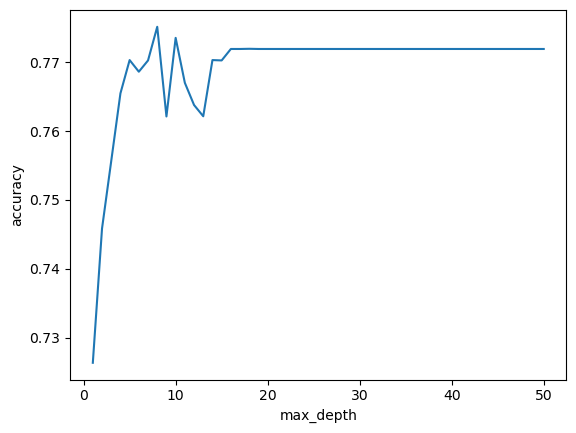

In [121]:
plt.figure()
plt.plot(range(1, max_depth + 1), scores)
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.savefig("./image/" + "random_forest" + '.png')

# use the best model to predict test data
best_depth = np.argmax(scores) + 1
print ("best depth is: ", best_depth, (np.max(scores)))


In [120]:
test_data = pd.read_csv("test.csv")

test_data_x = test_data.iloc[:, 1:]
test_data_x = test_data_x[retain_feature]

model = RandomForestClassifier(n_estimators=300, max_depth=best_depth, random_state=0)
model.fit(train_data_x, train_data_y)

test_data_y = model.predict(test_data_x)

# export result with csv format and clumn is pid and diabetes
print(test_data_y)
result = pd.DataFrame({'p_id': test_data['p_id'], 'diabetes': test_data_y})
result.to_csv('submission.csv', index=False)

[1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1
 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1
 1 1 1 0 0 1]
